In [1]:
# import numpy as np
# from sklearn.preprocessing import Imputer

# ratings = data['review_scores_rating']
# imp = Imputer(missing_values=np.nan, strategy='mean', axis=1)
# ratings = np.array(ratings).reshape(1, -1)
# imp.fit(ratings)
# ratings = imp.transform(ratings)
# ratings.shape
# sample_idxs = np.random.randint(ratings.shape[1], size=1000)
# sample_idxs
# np.take(ratings, sample_idxs)

In [2]:
# import math
# import matplotlib.pyplot as plt
# plt.hist(np.take(ratings, sample_idxs))
# len(data.columns)
# len(data.sample(1).values[0])
# for k, v in zip(data.columns, data.sample(1).values[0]): print k + ': ' + str(v)

In [3]:
import pandas as pd

In [4]:
all_data = pd.read_csv('./data/review_features.csv', low_memory=False)

In [118]:
data = all_data.sample(1000, random_state=1234)
cols_to_drop = ['access', 'amenities_', 'description', \
               'house_rules', 'id', 'host_verifications', 'last_review', 'last_scraped', \
               'market', 'neighborhood_overview', 'neighbourhood', 'neighbourhood_cleansed', \
               'neighbourhood_group_cleansed', 'notes', 'street', 'summary', 'transit', \
               'Unnamed: 0', 'first_review', 'calendar_last_scraped', 'calendar_updated', 
               'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', \
                'review_scores_communication', 'review_scores_location']
data.loc[:, cols_to_drop]
data = data.drop(cols_to_drop, axis=1)

data = data.replace('f', 0)
data = data.replace('t', 1)
data = data.replace(r'[\$,]','', regex=True)
# data['review_scores_rating']


# Get a list of non-numeric columns so we can drop them
from collections import defaultdict

non_numeric_columns = defaultdict(int)

for d in data.values:
    for k, v in zip(data.columns, d):
        if 'Mission' == v:
            print k, v
        
        try: 
            float(v)
        except Exception as e:
            non_numeric_columns[k] += 1

print non_numeric_columns.keys()
# data = data.drop(non_numeric_columns.keys(), axis=1)

['interaction', 'name', 'license', 'space', 'cancellation_policy', 'host_response_time', 'host_since', 'host_neighbourhood', 'host_response_rate', 'host_name', 'host_about', 'property_type', 'host_location', 'host_acceptance_rate']


In [119]:
dependent_variable = 'review_scores_rating'

In [120]:
# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])
y = data[dependent_variable]

In [121]:
# Test for collinearity

collinear = data.corr()
s = collinear.unstack()
so = s.sort_values(kind='quicksort')
so.to_csv('collinearity_values.csv')

In [122]:
# so[-1*(len(so)):-1*(len(so)-100)]

In [123]:
# read most correlated columns from csv, and drop them

corr_cols_to_drop = pd.read_csv('./correlated_columns.csv', encoding='utf8').values.reshape(1,-1).tolist()[0]

In [124]:
# drop review_ related columns
review_columns = defaultdict(int)
for c in data.columns:
    if 'review' in c:
        review_columns[c] += 1
review_columns.keys()

['reviews_per_month',
 'number_of_reviews',
 'review_scores_value',
 'review_scores_rating']

In [125]:
# Drop zipcode, longitude, latitude and such
others = ['zipcode', 'latitude', 'longitude']

In [126]:
cols_to_drop = set(review_columns.keys()).union(non_numeric_columns.keys()).union(corr_cols_to_drop).union(others)
# cols_to_drop

In [127]:
X = data.drop(cols_to_drop, axis=1)

In [128]:
for c in X.columns:
    if 'review' in c:
        print c

In [129]:
import numpy as np
from sklearn.preprocessing import Imputer


imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(X)
X = imp.transform(X)

imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(y)
y = imp.transform(y.values.reshape(-1,1))
y = y.ravel()

print X.shape
print y.shape

# imp.fit(X_train)
# X_train = imp.transform(X_train)

# imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
# imp.fit(X_test)
# X_test = imp.transform(X_test)


# y_train = np.array(y_train).reshape(1, -1)
# imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
# imp.fit(y_train)
# y_train = imp.transform(y_train)
# y_train = y_train.reshape(-1, 1)
# y_train = y_train.ravel()

# y_test = np.array(y_test).reshape(1, -1)
# imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
# imp.fit(y_test)
# y_test = imp.transform(y_test)
# y_test = y_test.reshape(-1, 1)
# y_test = y_test.ravel()

# print X_train.shape
# print y_train.ravel().shape

(782, 168)
(782,)


In [130]:
# Scale the dependent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)
X = scaler.transform(X)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(y.reshape(-1,1))
y = scaler.transform(y.reshape(-1,1))
y = y.ravel()

In [131]:
print X.shape
print y.shape

(782, 168)
(782,)


In [133]:
# Try PCA
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=10)
X = pca.fit_transform(X)


In [134]:
print X.shape
print y.shape

(782, 10)
(782,)


In [113]:
# Try KernelPCA

kcpa = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X = kcpa.fit_transform(X)

print X.shape
print y.shape

(782, 781)
(782,)


In [78]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2)

# X = poly.fit_transform(X)

In [135]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1234)

Mean squared error: 0.86
Variance score: 0.00


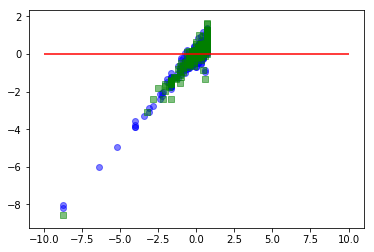

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score

# Create linear regression object
regr = linear_model.Lasso(alpha=0.01, fit_intercept=True, max_iter=1000, tol=0.1)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=-10, xmax=10, color='r')
plt.show()

In [137]:
print np.min(y_test)
print np.max(y_test)

-8.790357954693961
0.6777181040790532


In [138]:
print np.min(y_pred)
print np.max(y_pred)

-0.9681300583724011
1.8678057720186345


In [ ]:
# MSE without dropping nan from predictor
# Mean squared error: 47.72
# Variance score: 0.08


Mean squared error: 0.87
Variance score: -0.00


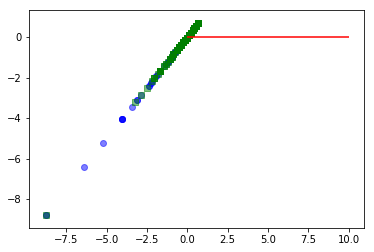

In [139]:
import math

# Create linear regression object
regr = linear_model.ElasticNet(normalize=True, alpha=0.05, fit_intercept=True)

y_traint = y_train
y_testt = y_test

# Train the model using the training sets
regr.fit(X_train, y_traint)



y_train_pred = map(lambda x: round(x, 8), regr.predict(X_train))

# Make predictions using the testing set
y_pred = map(lambda x: round(x, 8), regr.predict(X_test))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_testt, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_testt, y_pred))

# Plot the residuals
plt.scatter(y_traint, y_traint-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_testt, y_testt-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=10, color='r')
plt.show()

In [140]:
print np.min(y_test)
print np.max(y_test)

-8.790357954693961
0.6777181040790532


In [141]:
print np.min(y_train)
print np.max(y_train)

-8.790357954693961
0.6777181040790532


In [142]:
import math

# Create linear regression object
# regr = linear_model.ElasticNet(normalize=True, alpha=0.05, fit_intercept=True)

# y_traint = np.array(map(lambda x: math.log(x+1), y_train))
# y_testt = np.array(map(lambda x: math.log(x+1), y_test))

y_traint = np.array(map(lambda x: x+1, y_train))
y_traint_var = np.var(y_traint)
y_traint_weights = np.array(map(lambda x: (x/y_traint_var), y_traint))

y_testt = np.array(map(lambda x: x+1, y_test))
y_testt_var = np.var(y_testt)
y_testt_weights = np.array(map(lambda x: (x/y_testt_var), y_testt))


regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)


# Train the model using the training sets
regr.fit(X_train, y_traint, sample_weight=y_traint_weights)



y_train_pred = map(lambda x: round(x, 8), regr.predict(X_train))

# Make predictions using the testing set
y_pred = map(lambda x: round(x, 8), regr.predict(X_test))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_testt, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_testt, y_pred))

# Plot the residuals
plt.scatter(y_traint, y_traint-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_testt, y_testt-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=10, color='r')
plt.show()

/Users/jhabib/miniconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:221: RuntimeWarning: invalid value encountered in sqrt
  sample_weight = np.sqrt(sample_weight)


ValueError: array must not contain infs or NaNs

In [ ]:
#  The bias and heteroscadasticity is epic in the redisual plot
# Let's transform the dependent variable


In [ ]:
for i, j in zip(y_test[:20], y_pred[:20]): print i, j

In [ ]:
# With imputing by mean
# Mean squared error: 18099081.99
# Variance score: -371456.56

In [143]:
from sklearn import neural_network

# Create neural net object
nn = neural_network.MLPRegressor(alpha=0.7, warm_start=False, activation='logistic', \
                                learning_rate='invscaling', solver='sgd', max_iter=1000)

# Train the model using the training sets
nn.fit(X_train, y_train)

y_train_pred = map(lambda x: round(x, 0), nn.predict(X_train))

# Make predictions using the testing set
y_pred = nn.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.tolist(), y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.tolist(), y_pred))


Mean squared error: 0.86
Variance score: 0.01


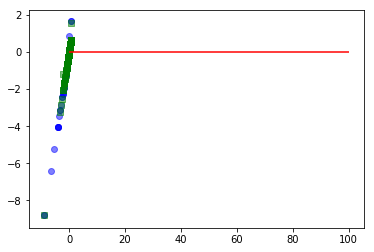

In [144]:
# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=100, color='r')
plt.show()

In [145]:
for i, j in zip(y_test[:20], y_pred[:20]): print i, j

0.08596335040573971 -0.0
-0.03238760032892298 -0.0
0.20431430114040242 -0.0
-1.6893009106142007 -0.0
-0.26908950179824837 0.0
0.6777181040790532 -0.0
0.20431430114040242 -0.0
-0.26908950179824837 -0.0
-0.03238760032892298 -0.0
-0.03238760032892298 -0.0
0.08596335040573971 -0.0
0.6777181040790532 -0.0
0.6777181040790532 0.0
0.6777181040790532 -0.0
0.6777181040790532 -0.0
0.20431430114040242 -0.0
0.6777181040790532 -0.0
0.3226652518750651 -0.0
-0.6241423540022365 -0.0
0.4410162026097278 -0.0
